# IBM Capstone Project

This notebook will be used for the purpose to complete the capstone project for IBM data science certification.

In [25]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO



from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1h-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [ ]:
print ("Hello Capstone Project Course!")

Data Sources

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

In [26]:
!wget -O car_crash.csv http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
df = pd.read_csv('car_crash.csv')
df.head()

--2020-10-07 05:59:37--  http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)... 52.55.102.109, 52.4.11.15, 52.2.161.122, ...
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|52.55.102.109|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv [following]
--2020-10-07 05:59:37--  https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|52.55.102.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘car_crash.csv’

    [     <=>                               ] 85,042,856  84.1MB/s   in 1.0s

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


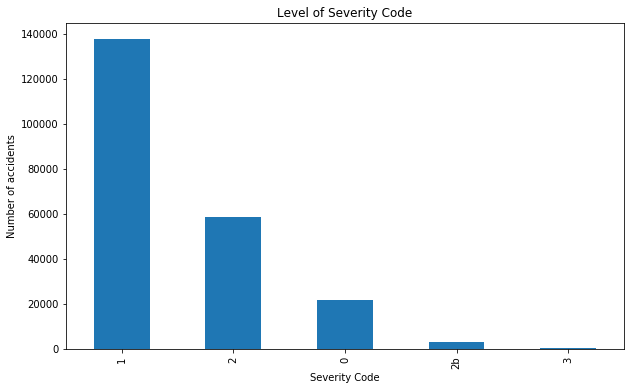

In [32]:
df['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Level of Severity Code') # add title to the plot

plt.show()

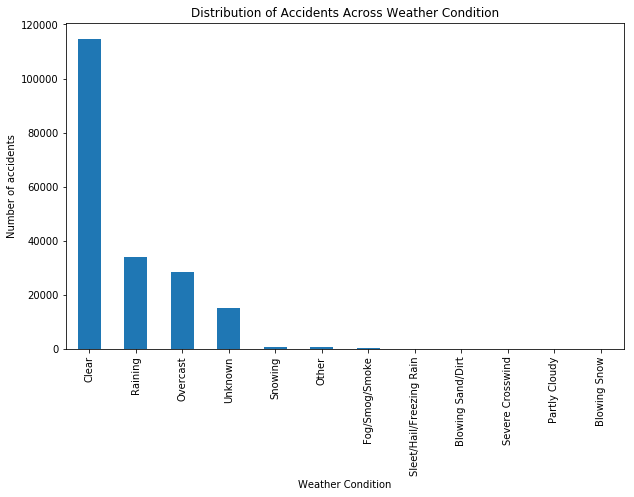

In [49]:
df['WEATHER'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Weather Condition') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Distribution of Accidents Across Weather Condition') # add title to the plot

plt.show()

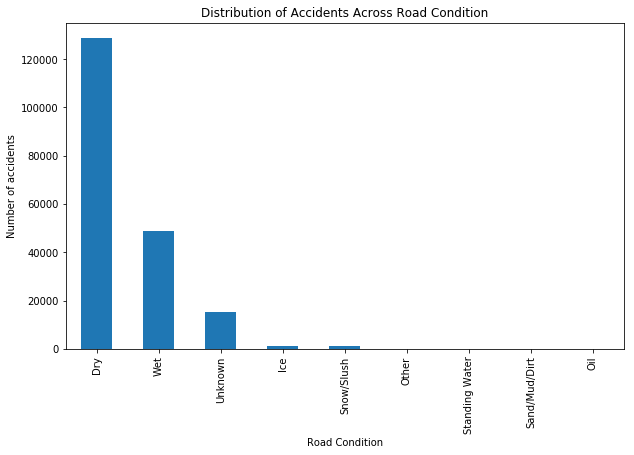

In [50]:
df['ROADCOND'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Road Condition') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Distribution of Accidents Across Road Condition') # add title to the plot

plt.show()

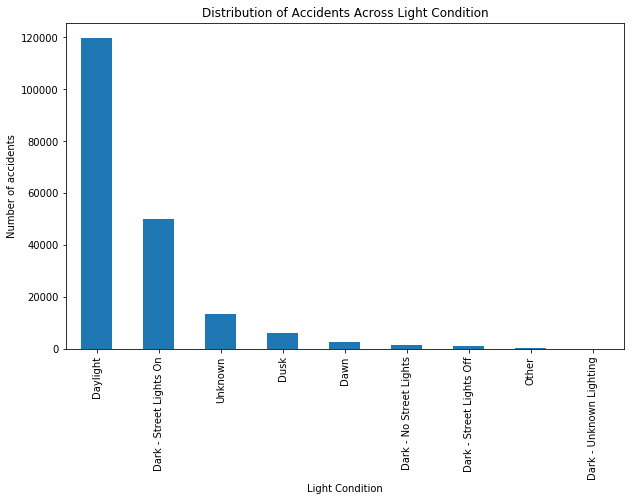

In [51]:
df['LIGHTCOND'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Light Condition') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Distribution of Accidents Across Light Condition') # add title to the plot

plt.show()

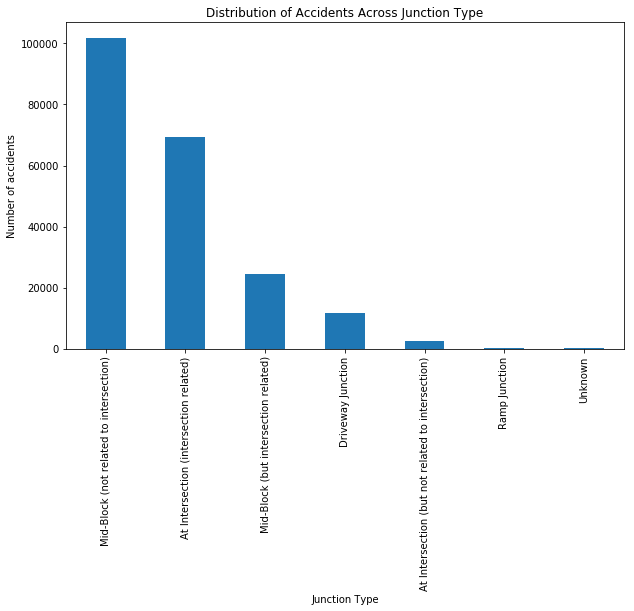

In [58]:
df['JUNCTIONTYPE'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Junction Type') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Distribution of Accidents Across Junction Type') # add title to the plot

plt.show()

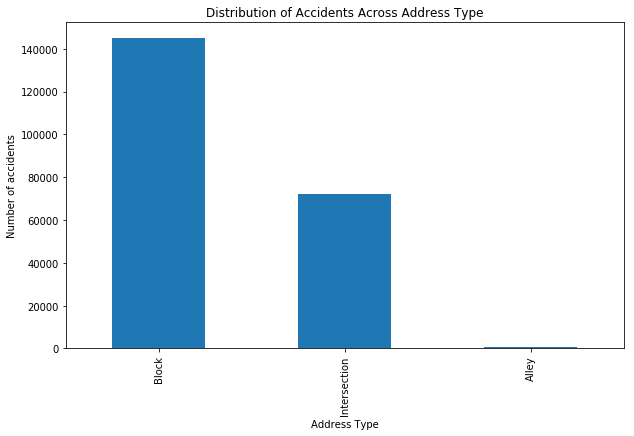

In [59]:
df['ADDRTYPE'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Address Type') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Distribution of Accidents Across Address Type') # add title to the plot

plt.show()

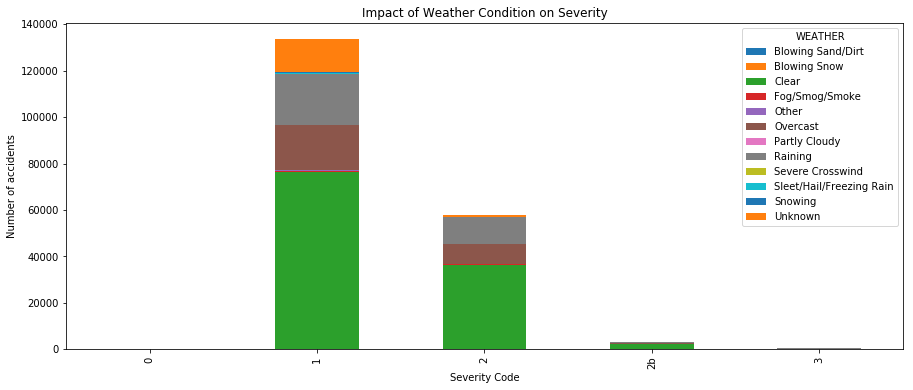

In [47]:
df.groupby(['SEVERITYCODE','WEATHER']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Weather Condition on Severity') # add title to the plot

plt.show()

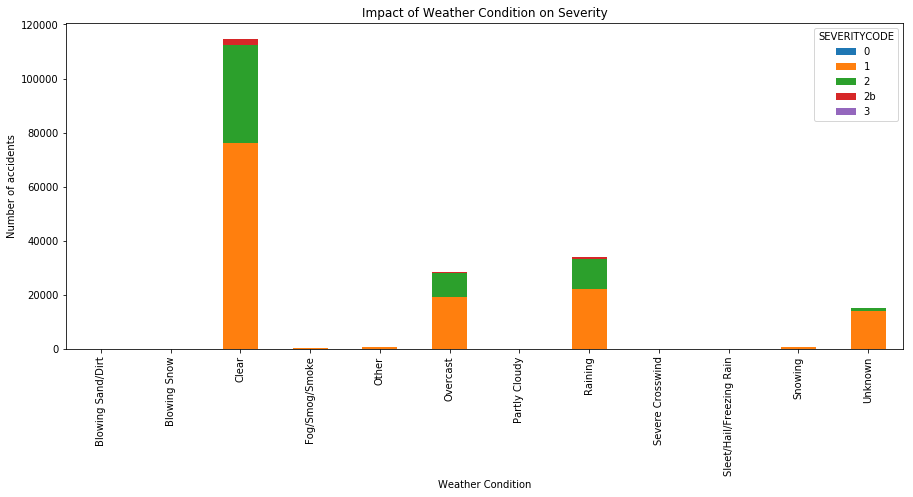

In [68]:
df.groupby(['WEATHER','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Weather Condition') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Weather Condition on Severity') # add title to the plot

plt.show()

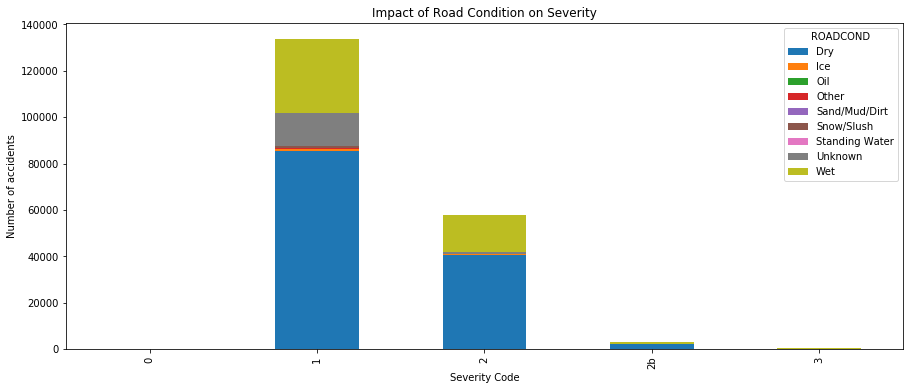

In [52]:
df.groupby(['SEVERITYCODE','ROADCOND']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Road Condition on Severity') # add title to the plot

plt.show()

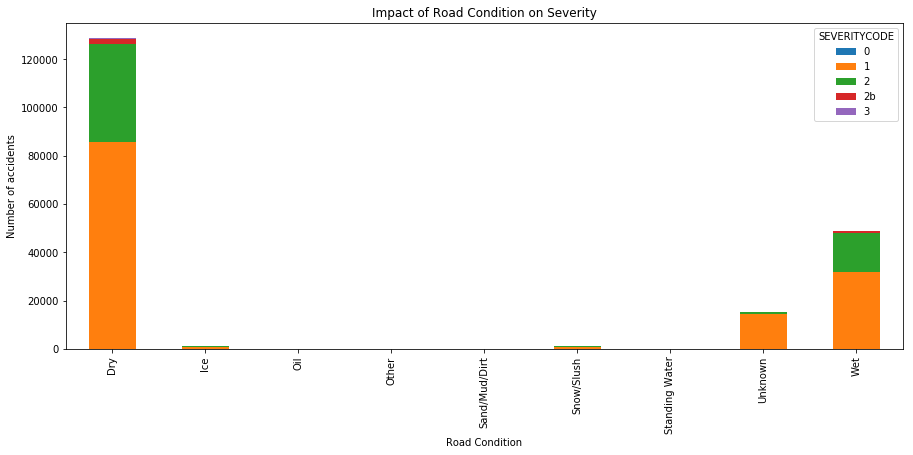

In [67]:
df.groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Road Condition') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Road Condition on Severity') # add title to the plot

plt.show()

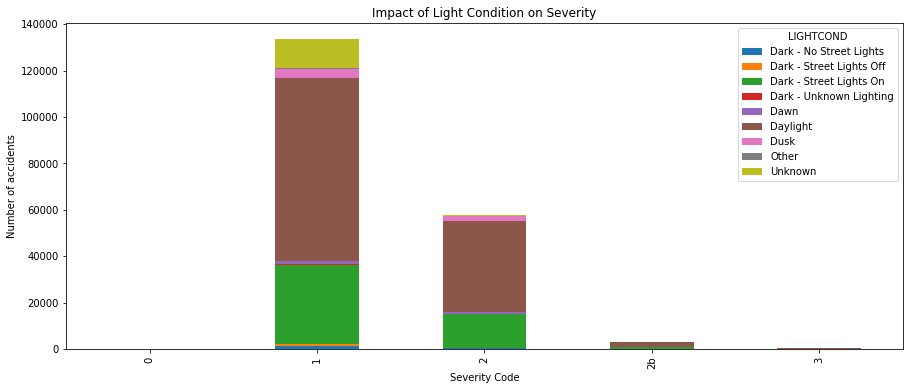

In [53]:
df.groupby(['SEVERITYCODE','LIGHTCOND']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Light Condition on Severity') # add title to the plot

plt.show()

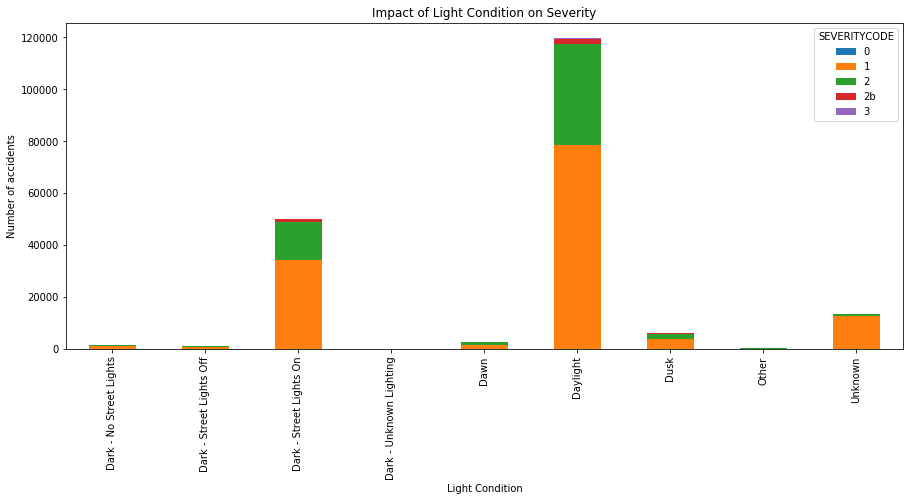

In [66]:
df.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Light Condition') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Light Condition on Severity') # add title to the plot

plt.show()

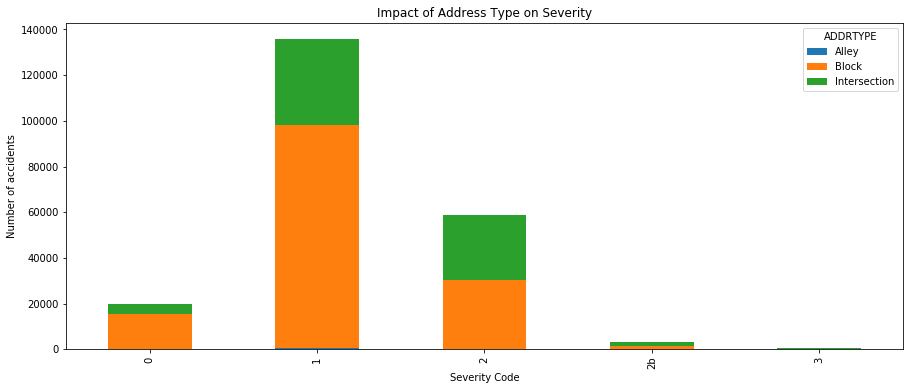

In [60]:
df.groupby(['SEVERITYCODE','ADDRTYPE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Address Type on Severity') # add title to the plot

plt.show()

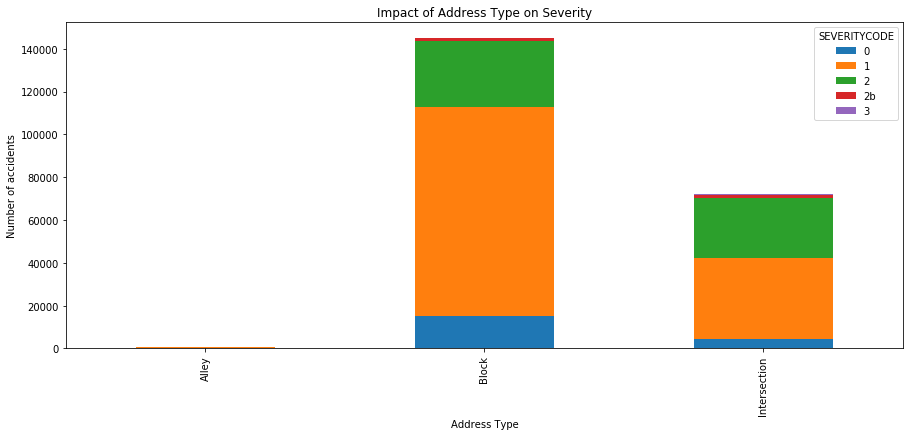

In [65]:
df.groupby(['ADDRTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Address Type') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Address Type on Severity') # add title to the plot

plt.show()

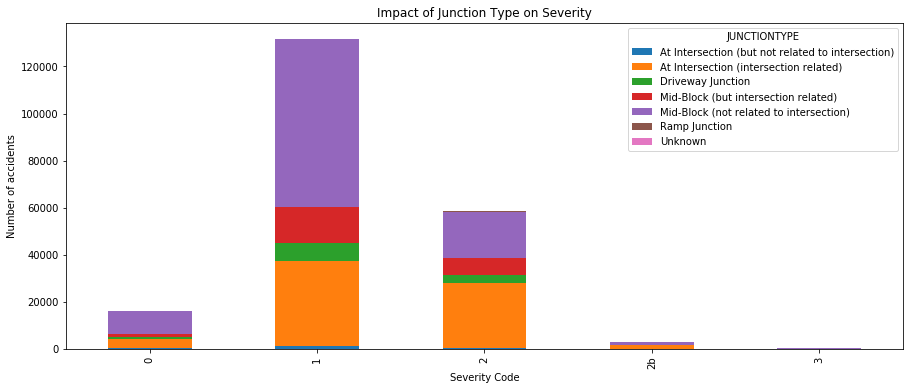

In [62]:
df.groupby(['SEVERITYCODE','JUNCTIONTYPE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Junction Type on Severity') # add title to the plot

plt.show()

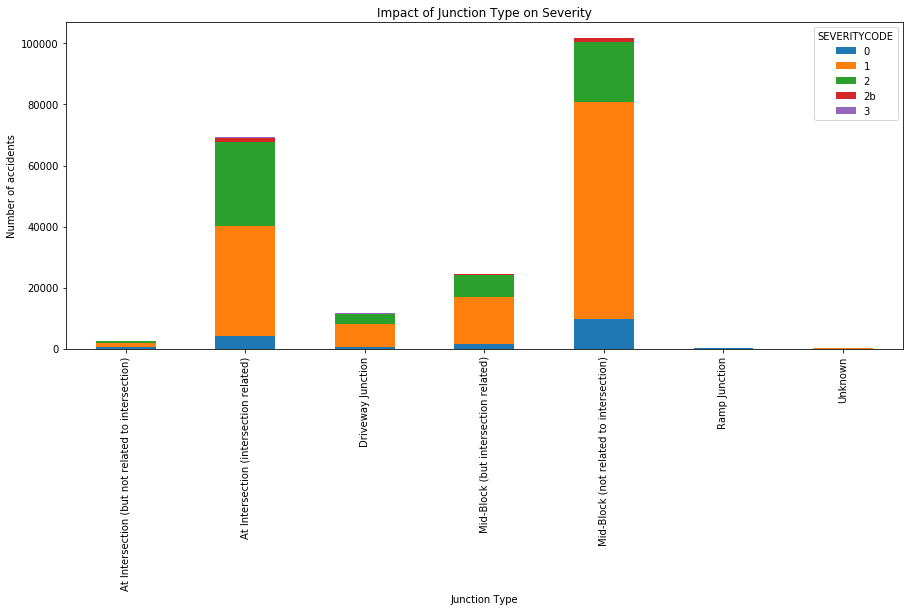

In [69]:
df.groupby(['JUNCTIONTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15, 6))

plt.xlabel('Junction Type') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Impact of Junction Type on Severity') # add title to the plot

plt.show()

In [27]:
#initial interest data
df_clean = df[['SEVERITYCODE','JUNCTIONTYPE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]

#remove rows with unknowns in feature
df_clean = df_clean[df_clean.JUNCTIONTYPE != 'Unknown']
df_clean = df_clean[df_clean.WEATHER != 'Unknown']
df_clean = df_clean[df_clean.WEATHER != 'Other']
df_clean = df_clean[df_clean.ROADCOND != 'Unknown']
df_clean = df_clean[df_clean.LIGHTCOND != 'Unknown']
df_clean = df_clean[df_clean.LIGHTCOND != 'Other']
df_clean = df_clean[df_clean.LIGHTCOND != 'Dark - Unknown Lighting']

#remove rows with unknown and fatality
df_clean = df_clean[df_clean.SEVERITYCODE != '0']
df_clean = df_clean[df_clean.SEVERITYCODE != '3']
df_clean['SEVERITYCODE'].replace(to_replace=['1','2','2b'], value=[0,1,1],inplace=True)

df_clean['SPEEDING'] = df_clean['SPEEDING'].fillna(0)
df_clean['SPEEDING'].replace(to_replace=['Y'], value=[1],inplace=True)

#remove nan values
df_clean.dropna(inplace=True)

print ("Data processing complete")


Data processing complete


In [28]:
from sklearn.utils import resample

print("Severity code breakdown ",df_clean.SEVERITYCODE.value_counts())

# Separate majority and minority classes
df_majority = df_clean[df_clean.SEVERITYCODE==0]
df_minority = df_clean[df_clean.SEVERITYCODE==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=59044,     # to match minority class
                                 random_state=4) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
  
# Display new class counts
print ("down sample " ,df_downsampled.SEVERITYCODE.value_counts())
df_downsampled.shape

Severity code breakdown  0.0    113354
1.0     59044
Name: SEVERITYCODE, dtype: int64
down sample  1.0    59044
0.0    59044
Name: SEVERITYCODE, dtype: int64


(118088, 7)

In [7]:
#perform one hot encoding
Feature = df_downsampled[['SPEEDING']]
Feature = pd.concat([Feature,pd.get_dummies(df_downsampled['JUNCTIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_downsampled['ADDRTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_downsampled['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_downsampled['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_downsampled['LIGHTCOND'])], axis=1)

X = Feature
y = df_downsampled['SEVERITYCODE'].values
                    
print ("Feature ", Feature.shape)

Feature  (118088, 33)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (88566, 33) (88566,)
Test set: (29522, 33) (29522,)


In [ ]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    print ("K ",n, " Accuracy ",mean_acc[n-1] )
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()



K  1  Accuracy  0.5726576790190366
K  2  Accuracy  0.5218481132714585
K  3  Accuracy  0.5868504843845268
K  4  Accuracy  0.520831921956507
K  5  Accuracy  0.544068830025066
K  6  Accuracy  0.5281146263803266
K  7  Accuracy  0.588510263532281
K  8  Accuracy  0.5905765192060158
K  9  Accuracy  0.5905087731183524
K  10  Accuracy  0.587189214822844
K  11  Accuracy  0.5912539800826502
K  12  Accuracy  0.5767224442788429
K  13  Accuracy  0.5910507418196599
K  14  Accuracy  0.5808210825824809
K  15  Accuracy  0.552503217939164
K  16  Accuracy  0.5904749000745207
K  17  Accuracy  0.5908475035566696
K  18  Accuracy  0.545762482216652
K  19  Accuracy  0.5902716618115303
K  20  Accuracy  0.578517715601924
K  21  Accuracy  0.5790596843032315
K  22  Accuracy  0.5795000338730438
K  23  Accuracy  0.5912878531264819
K  24  Accuracy  0.590441027030689
K  25  Accuracy  0.5939976966330195
K  26  Accuracy  0.5943703001151683
K  27  Accuracy  0.5939638235891878
K  28  Accuracy  0.5927105209674142
K  29  Ac

In [10]:
#Best K to use for the model would be 26. Rebuild the model using n-neighbors = 26

neigh = KNeighborsClassifier(n_neighbors = 26).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("F1 score K Neighbor: ", metrics.f1_score(y_test, yhat, average='weighted'))

Test set Accuracy:  0.5943703001151683
F1 score K Neighbor:  0.5936720303917736


In [12]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [9]:
from sklearn import tree
import pydotplus

#find the best depth
Ds = 10
for n in range(1,Ds):   
    collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    collisionTree.fit(X_train, y_train)
    yhat_Tree = loanTree.predict(X_test)
    print("DecisionTrees's Accuracy: ", n, metrics.accuracy_score(y_test, yhat_Tree))



DecisionTrees's Accuracy:  1 0.5928121400989093
DecisionTrees's Accuracy:  2 0.5928121400989093
DecisionTrees's Accuracy:  3 0.5958945870875957
DecisionTrees's Accuracy:  4 0.5958945870875957
DecisionTrees's Accuracy:  5 0.5968769053587155
DecisionTrees's Accuracy:  6 0.5973172549285278
DecisionTrees's Accuracy:  7 0.5968430323148838
DecisionTrees's Accuracy:  8 0.5967752862272204
DecisionTrees's Accuracy:  9 0.5961994444820812


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#depth of 6 gives the best accuracy    
#Use non-normalize data for easier visualization of the tree
X_tree = Feature
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split( X_tree, y, test_size=0.25, random_state=4)

collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
collisionTree.fit(X_train_tree, y_train_tree)
yhat_Tree = collisionTree.predict(X_test_tree)    
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_Tree))



DecisionTrees's Accuracy:  0.5971140166655375


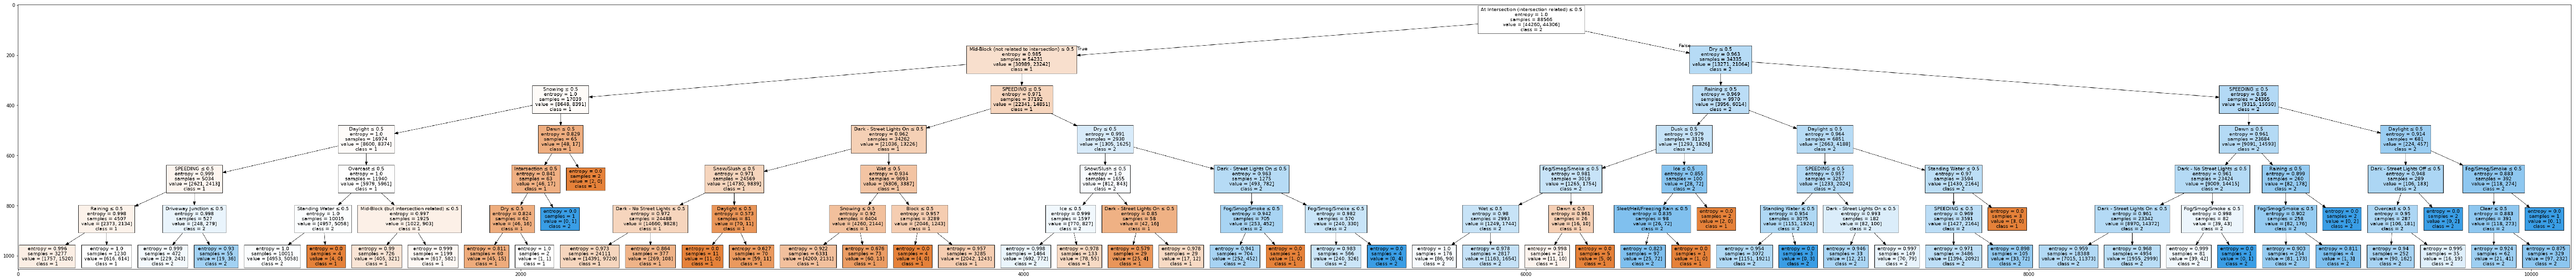

In [18]:
from sklearn import tree
import pydotplus
import matplotlib.image as mpimg

dot_data = StringIO()
filename = "collisiontree.png"
featureNames = X_tree.columns[0:33]
targetNames = df_clean['SEVERITYCODE'].unique().tolist()

out=tree.export_graphviz(collisionTree,feature_names=featureNames, out_file=dot_data, class_names= ['1','2'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [37]:
from sklearn import svm

svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train) 
yhat_rbf = svm_rbf.predict(X_test)
print("SVM RBF Accuracy: ", metrics.accuracy_score(y_test, yhat_rbf))

svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train, y_train) 
yhat_poly = svm_poly.predict(X_test)
print("SVM Poly Accuracy: ", metrics.accuracy_score(y_test, yhat_poly))

svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train) 
yhat_sigmoid = svm_sigmoid.predict(X_test)
print("SVM Sigmoid Accuracy: ", metrics.accuracy_score(y_test, yhat_sigmoid))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM RBF Accuracy:  0.5199


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Poly Accuracy:  0.5154


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Sigmoid Accuracy:  0.5166


In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_log = LR.predict(X_test)
yhat_log_prob = LR.predict_proba(X_test)

print("Log Regression Accuracy: ", metrics.accuracy_score(y_test, yhat_log))
print("Log Regression Log Loss: ", metrics.log_loss(y_test, yhat_log_prob))

Log Regression Accuracy:  0.5949800149041393
Log Regression Log Loss:  0.6708742641502969


In [22]:
#Algorithm KNN 
yhat_KNN = neigh.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, yhat_KNN)
knn_f1 = metrics.f1_score(y_test, yhat_KNN, average='weighted')
print("KNN Jaccard: ", knn_accuracy)
print("KNN F1 score: ", knn_f1)


#Algorithm Decision Tree
yhat_tree = collisionTree.predict(X_test)
tree_accuracy = metrics.accuracy_score(y_test, yhat_tree)
tree_f1 = metrics.f1_score(y_test, yhat_tree, average='weighted')
print("Decision Tree Jaccard: ", tree_accuracy)
print("Decision Tree F1 score: ", tree_f1)

#Alogrithm Log Regression
yhat_log = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
log_accuracy = metrics.accuracy_score(y_test, yhat_log)
log_f1 = metrics.f1_score(y_test, yhat_log, average='weighted')
log_loss = metrics.log_loss(y_test, yhat_prob)
print("Log Regression Jaccard: ", log_accuracy)
print("Log Regression F1 score: ", log_f1)
print("Log Regression Log Loss: ", log_loss)

print("Algorithm\tJaccard\t\tF1-score\tLogLoss")
print("KNN\t\t","{:.6f}".format(knn_accuracy),"\t","{:.6f}".format(knn_f1),"\t NA")
print("Decision Tree\t","{:.6f}".format(tree_accuracy),"\t","{:.6f}".format(tree_f1),"\t NA")
print("LogRegression\t","{:.6f}".format(log_accuracy),"\t","{:.6f}".format(log_f1),"\t","{:.6f}".format(log_loss))

KNN Jaccard:  0.5943703001151683
KNN F1 score:  0.5936720303917736
Decision Tree Jaccard:  0.5971140166655375
Decision Tree F1 score:  0.5967854998997867
Log Regression Jaccard:  0.5949800149041393
Log Regression F1 score:  0.5922536151308009
Log Regression Log Loss:  0.6708742641502969
Algorithm	Jaccard		F1-score	LogLoss
KNN		 0.594370 	 0.593672 	 NA
Decision Tree	 0.597114 	 0.596785 	 NA
LogRegression	 0.594980 	 0.592254 	 0.670874
